# Predicting Student Mental Health  Using Machine Learning
*Author:* Sulha Shibin P 
*Organization:* Entri Elevate  
*Date:* 01/07/2024


## Table of Contents
1. [Overview of Problem Statement](#overview-of-problem-statement)
2. [Objective](#objective)
3. [Data Collection](#data-collection)
4. [Data Description](#data-description)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Data Preprocessing](#data-preprocessing)
7. [Data Encoding](#data-encoding)
8. [Feature Engineering](#feature-engineering)
9. [Scaling](#scaling)
10. [Model Selection](#model-selection)
11. [Feature Selection](#feature-selection)
12. [Splitting](#splitting)
13. [Evaluation of Model](#evaluation-of-model)
14. [Result](#result)
15. [Model Deployment](#model-deployment)
16. [Limitations](#limitations)
17. [Conclusion](#conclusion)
18. [Future Work](#future-work)

   
   


## 1.Overview of the Problem Statement
 Predicting student mental health by analyzing various factors to identify students at risk for high stress, anxiety, or depression.”\


## 2.Objective
 Develop a predictive model to identify students at risk of mental health issues. The target variable for the model is the *Overall Mental Health Score*, which is a composite score calculated using the Depression Score, Anxiety Score, and Stress Level. The model aims to analyze factors like sleep quality, diet quality, and other relevant variables to predict this Overall Mental Health Score with high accuracy.

## 3.Data Collection

In [2]:
# Import required libraries
import pandas as pd                  
import numpy as np                   
import matplotlib.pyplot as plt      
import seaborn as sns    

#Load the dataset from a csv file
data = pd.read_csv("students_mental_health_survey.csv")
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


## 4.Data Description

In [3]:
# Display the shape of the dataset
data.shape

(7022, 20)



##### Detailed Description of Features


- *Age:*        The age of the student.
- *Course:*     The course or program the student is enrolled in.
- *Gender:*      The gender of the student.
- *Stress Level:*   A numeric score representing the level of stress experienced by the student.
- *Depression Score:* A numeric score representing the level of depression experienced by the student.
- *Anxiety Level:* A numeric score representing the level of anxiety experienced by the student.
- *Sleep Quality:* A categorical variable representing the quality of the student’s sleep (e.g., Poor, Average, Good).
- *Diet Quality:* A categorical variable representing the quality of the student’s diet (e.g., Poor, Average, Good, ).
- *Physical Activity:* A categorical variable representing the level of physical activity engaged in by the student (e.g., Low, Moderate, High).
- *Social Support:* A categorical variable representing the level of social support the student receives (e.g., Low, Moderate, High).
- *Relationship Status:* A categorical variable representing the current relationship status of the student (e.g., Single, In a Relationship).
- *Substance Use:* A categorical variable representing the extent of substance use by the student (e.g., Never, Occasional, Frequently).
- *Counseling Service Use:* A binary variable indicating whether the student has used counseling services (Yes/No).
- *Family History:* A binary variable indicating if there is a family history of mental health issues (Yes/No).
- *Chronic Illness:* A binary variable indicating if the student has a chronic illness (Yes/No).
- *Financial Stress:* A numeric score representing the level of financial stress experienced by the student.
- *Extracurricular Involvement:* A categorical variable representing the level of involvement in extracurricular activities 
- *Semester Credit Load:* The number of credits the student is enrolled in for the semester.
- *Residence Type:* A categorical variable representing the type of accommodation the student is living in (e.g., On-campus, Off-campus).


## 5.EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [5]:
data.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [6]:
data.isnull().sum()  #missing values

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

In [7]:
data.dtypes  #Checking Data Types

Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

In [8]:
data.duplicated().any()  # Checking Duplicate Values

False

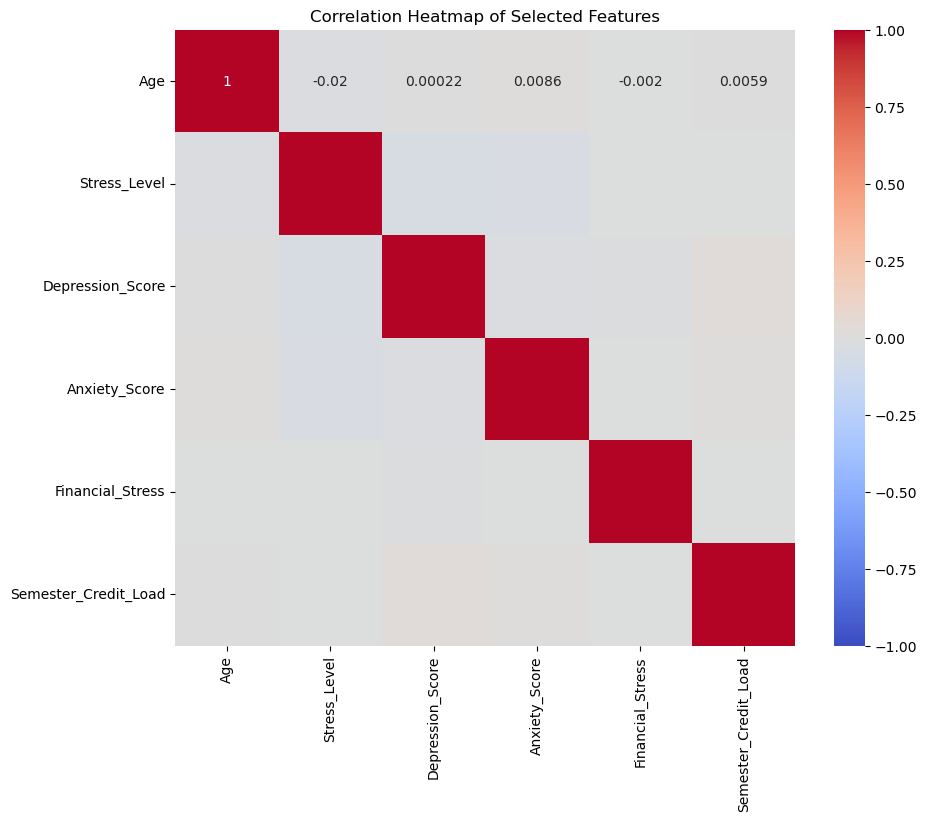

In [9]:
#Checking Correlation
features_of_interest = data[['Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']]
corr_matrix = features_of_interest.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


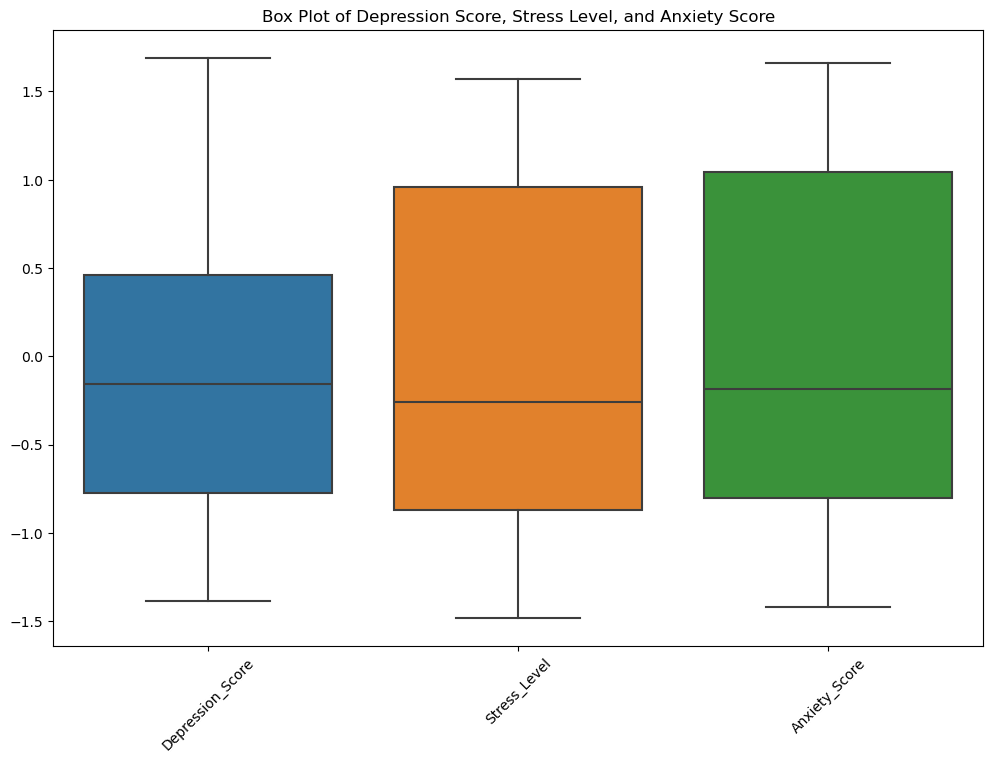

In [27]:
#Checking Outliers & Skewness
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[[ 'Depression_Score', 'Stress_Level', 'Anxiety_Score']])
plt.xticks(rotation=45)
plt.title('Box Plot of Depression Score, Stress Level, and Anxiety Score')
plt.show()


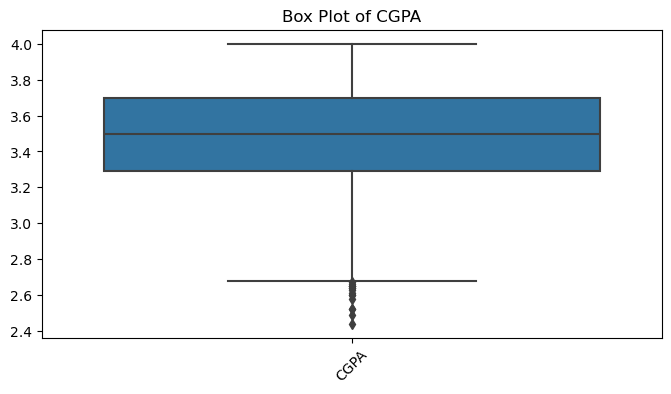

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[[ 'CGPA']])
plt.xticks(rotation=45)
plt.title('Box Plot of CGPA')
plt.show()


## 6.Data Preprocessing

#### Handling Missing Values

In [12]:

data.dropna(subset=['Substance_Use'], inplace=True)
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)

## 7.Data Encoding

In [13]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Course'] = label_encoder.fit_transform(data['Course'])


In [14]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Relationship_Status', 'Chronic_Illness', 'Residence_Type'], dtype=int)


In [15]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder  
ordinal_features = ['Diet_Quality', 'Sleep_Quality', 'Substance_Use', 'Social_Support', 'Physical_Activity', 'Extracurricular_Involvement', 'Counseling_Service_Use']
ordinal_categories = [['Poor', 'Average', 'Good'], ['Poor', 'Average', 'Good'], ['Never', 'Occasionally', 'Frequently'], ['Low', 'Moderate', 'High'], ['Low', 'Moderate', 'High'], ['Low', 'Moderate', 'High'], ['Never', 'Occasionally', 'Frequently']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])
data.head()


,Age,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Gender_Female,Gender_Male,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Chronic_Illness_No,Chronic_Illness_Yes,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family
0,25,5,3.56,3,3,2,2.0,1.0,2.0,1.0,...,0,1,0,1,0,1,0,0,1,0
1,24,2,2.44,0,3,0,1.0,0.0,1.0,0.0,...,1,0,0,0,1,1,0,0,1,0
2,19,0,3.74,4,0,3,2.0,0.0,1.0,1.0,...,1,0,1,0,0,1,0,0,1,0
4,18,0,3.40,3,3,4,2.0,0.0,1.0,2.0,...,0,1,0,1,0,0,1,0,1,0
5,21,4,3.35,2,4,3,2.0,1.0,2.0,2.0,...,1,0,0,0,1,1,0,1,0,0


## 8.Feature Engineering

In [16]:
# Create the target variable
data['Overall_Mental_Health_Score'] = data[['Stress_Level', 'Depression_Score', 'Anxiety_Score']].mean(axis=1)
data.head() 

,Age,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Gender_Male,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Chronic_Illness_No,Chronic_Illness_Yes,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family,Overall_Mental_Health_Score
0,25,5,3.56,3,3,2,2.0,1.0,2.0,1.0,...,1,0,1,0,1,0,0,1,0,2.666667
1,24,2,2.44,0,3,0,1.0,0.0,1.0,0.0,...,0,0,0,1,1,0,0,1,0,1.000000
2,19,0,3.74,4,0,3,2.0,0.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,2.333333
4,18,0,3.40,3,3,4,2.0,0.0,1.0,2.0,...,1,0,1,0,0,1,0,1,0,3.333333
5,21,4,3.35,2,4,3,2.0,1.0,2.0,2.0,...,0,0,0,1,1,0,1,0,0,3.000000


In [17]:
# Create additional features
data['High_Risk_Indicator'] = (data['Overall_Mental_Health_Score'] > 1).astype(int)
data.head()

,Age,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Chronic_Illness_No,Chronic_Illness_Yes,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family,Overall_Mental_Health_Score,High_Risk_Indicator
0,25,5,3.56,3,3,2,2.0,1.0,2.0,1.0,...,0,1,0,1,0,0,1,0,2.666667,1
1,24,2,2.44,0,3,0,1.0,0.0,1.0,0.0,...,0,0,1,1,0,0,1,0,1.000000,0
2,19,0,3.74,4,0,3,2.0,0.0,1.0,1.0,...,1,0,0,1,0,0,1,0,2.333333,1
4,18,0,3.40,3,3,4,2.0,0.0,1.0,2.0,...,0,1,0,0,1,0,1,0,3.333333,1
5,21,4,3.35,2,4,3,2.0,1.0,2.0,2.0,...,0,0,1,1,0,1,0,0,3.000000,1


## 9.Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
features_to_scale = ['Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Extracurricular_Involvement', 'Financial_Stress', 'Semester_Credit_Load', 'CGPA' ]
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
data.head()


,Age,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Chronic_Illness_No,Chronic_Illness_Yes,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family,Overall_Mental_Health_Score,High_Risk_Indicator
0,25,5,0.239484,0.349134,0.458344,-0.185486,0.885496,0.138478,1.594352,-0.161998,...,0,1,0,1,0,0,1,0,2.666667,1
1,24,2,-3.661647,-1.481531,0.458344,-1.416849,-0.620492,-1.290557,-0.003649,-1.586238,...,0,0,1,1,0,0,1,0,1.000000,0
2,19,0,0.866451,0.959355,-1.387766,0.430195,0.885496,-1.290557,-0.003649,-0.161998,...,1,0,0,1,0,0,1,0,2.333333,1
4,18,0,-0.317821,0.349134,0.458344,1.045877,0.885496,-1.290557,-0.003649,1.262242,...,0,1,0,0,1,0,1,0,3.333333,1
5,21,4,-0.491978,-0.261088,1.073714,0.430195,0.885496,0.138478,1.594352,1.262242,...,0,0,1,1,0,1,0,0,3.000000,1


## 10.Model  Selection

In [19]:


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'MLP Regressor': MLPRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}




## 11.Feature Selection

In [20]:
# Define the target variable and features
X = data.drop(columns=['Overall_Mental_Health_Score'])
y = data['Overall_Mental_Health_Score']


In [21]:
# Ensure all features in X are numeric before correlation calculation
X_numeric = X.select_dtypes(include=[np.number])


In [22]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
# 1. Filter Method (Correlation)
correlations = X_numeric.corrwith(y)
threshold = 0.005
selected_features_filter = correlations[abs(correlations) > threshold].index.tolist()

# 2. Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_numeric, y)
selected_features_rfe = X_numeric.columns[fit.support_].tolist()

# 3. SelectKBest
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X_numeric, y)
selected_features_kbest = X_numeric.columns[selector.get_support()].tolist()

# Combine selected features from all methods
combined_features = list(set(selected_features_filter) | set(selected_features_rfe) | set(selected_features_kbest))

# Print selected features
print("Selected Features using Filter Method:", selected_features_filter)
print("Selected Features using RFE:", selected_features_rfe)
print("Selected Features using SelectKBest:", selected_features_kbest)
print("Combined Selected Features:", combined_features)

# Use the combined selected features
X = X[combined_features]



Selected Features using Filter Method: ['Age', 'Course', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Counseling_Service_Use', 'Financial_Stress', 'Semester_Credit_Load', 'Relationship_Status_Single', 'Residence_Type_On-Campus', 'Residence_Type_With Family', 'High_Risk_Indicator']
Selected Features using RFE: ['Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Quality', 'Social_Support', 'Financial_Stress', 'Relationship_Status_Married', 'Relationship_Status_Single', 'Chronic_Illness_No', 'High_Risk_Indicator']
Selected Features using SelectKBest: ['Age', 'Course', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Physical_Activity', 'Diet_Quality', 'Social_Support', 'Counseling_Service_Use', 'Financial_Stress', 'Semester_Credit_Load', 'Residence_Type_On-Campus', 'Residence_Type_With Family', 'High_Risk_Indicator']
Combined Selected Features: ['Age', 'High_Risk_Indicator', 'Res

## 12.Splitting

In [23]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 13.Evaluation Of Model

In [24]:
# Train and evaluate models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    
    print(f'{name}:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R² Score: {r2:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'Median Absolute Error: {medae:.2f}')
    print('\n')


Linear Regression:
MSE: 0.00
RMSE: 0.00
R² Score: 1.00
MAE: 0.00
Median Absolute Error: 0.00


Random Forest:
MSE: 0.00
RMSE: 0.01
R² Score: 1.00
MAE: 0.00
Median Absolute Error: 0.00


Gradient Boosting:
MSE: 0.00
RMSE: 0.04
R² Score: 1.00
MAE: 0.03
Median Absolute Error: 0.02


Support Vector Regressor:
MSE: 0.00
RMSE: 0.05
R² Score: 1.00
MAE: 0.04
Median Absolute Error: 0.04


MLP Regressor:
MSE: 0.00
RMSE: 0.04
R² Score: 1.00
MAE: 0.02
Median Absolute Error: 0.01


AdaBoost Regressor:
MSE: 0.06
RMSE: 0.25
R² Score: 0.93
MAE: 0.20
Median Absolute Error: 0.16




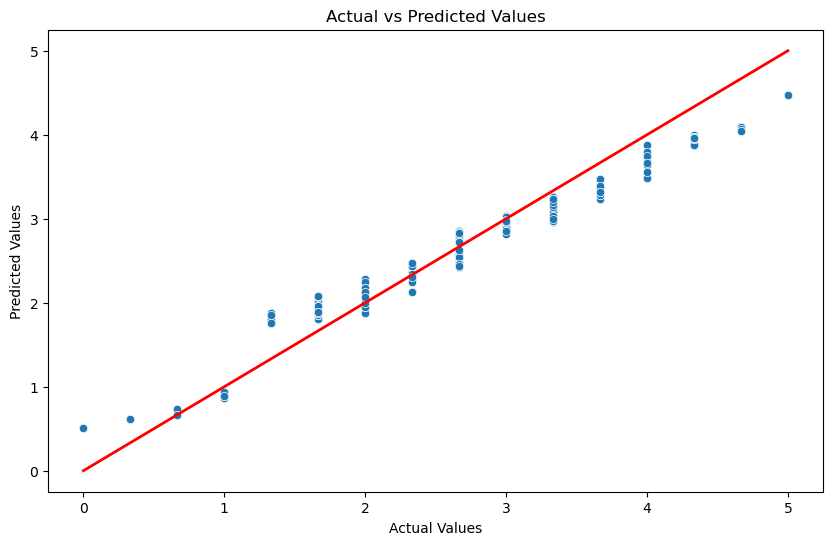

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# ploting Actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



## 14.Result

## 15.Model Deployment


In [135]:

# Save the best model (example: Random Forest Regressor)
import joblib
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

## 16.Limitation

## 17.Conclusion


## 18.Future Work
